# Lecture notes for 09 17 2020

# Group/Individual Challenge!

In this directory, I have included a FITS data file containing a 1D spectrum of absorption detected toward a cloud at the center of the Milky Way.
You can read these data into python using the astropy package. 



I have displayed the spectrum below (zooming in on the [OI] $^3P_2 -\; ^3P_1$ line at 63.2 $\mu$m).

(1) Calculate the equivalent width of this line (both in terms of wavelength $W_\lambda$ and the dimensionless equivalent width $W$ from Draine.

(2) Determine degeneracy of the upper and lower levels of this transition (Reference: Draine 4.5.1)

(3) Use this and the Einstein A ( $A_{ul} = 8.46\times10^{-5}$ ) to calculate $f_{ul}$ for this transition. 

(4) Calculate the column density, assuming the line to be optically thin, using equation 9.15 from Draine. Compare this to the value of the column density that was computed in the literature for this data set: $3.1\times10^{19}$ cm$^{-2}$ (Vastel et al. 2002; https://iopscience.iop.org/article/10.1086/344136/pdf)





In [2]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy
from scipy.integrate import trapz           # integration technique
from astropy import units as u              # This one helps with unit conversion

from IPython.display import display, Markdown
from astropy import constants as const


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer



Equivalent Widths: \
    W<sub>$\lambda$</sub> = 0.013 \
    W = 0.000206065  
    Oscillator Strength:  
    f<sub>ul</sub> = 8.45e-09 \
    N = 4.36e+18 1 / cm2

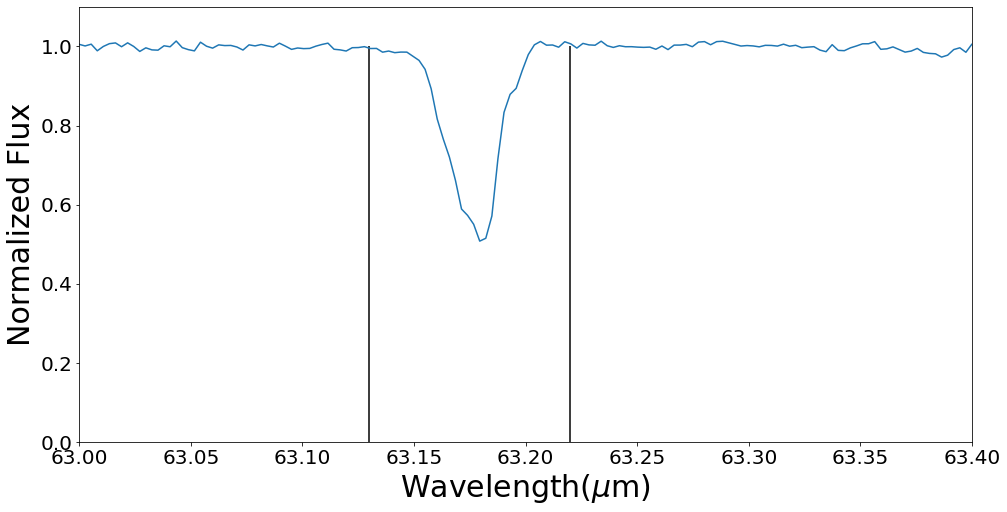

In [15]:
import astropy.io.fits as fits              # I use this to import FITS images. 
                                            # Astropy should be included in your conda installation


fits_table = 'support_files/B2_Full.fits'
hdul = fits.open(fits_table)    # open a FITS file
data = hdul[1].data             # assume the first extension is a table
wavelength = data.field(0)      # grab column 1
norm_flux = data.field(1)       # grab column 2
                                
                                # Wavelength units: microns
                                # Flux units: Watts per cm^2 per micron 
                                # (if data were not normalized; actually, y values are unitless)

plt.figure(0,figsize=(16,8))
ax = plt.subplot()
plt.plot(wavelength,norm_flux)
plt.xlim(63,63.4) # Set the limits of wavelength to look at
plt.ylim(0,1.1)   # Note that this is a normalized flux, sometimes called "line-to-continuum ratio"
plt.xlabel("Wavelength($\mu$m)",fontsize=30)
plt.ylabel("Normalized Flux",fontsize=30)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 

#extract chunk of interest 
pos = wavelength[(wavelength>63.13) & (wavelength<63.21)]
flux = norm_flux[np.where(wavelength==pos[0])[0][0]-1:np.where(wavelength==pos[len(pos)-1])[0][0]]

#integrate
w_lambda = trapz(1-flux,pos)

plt.vlines(63.13,ymin=0.0,ymax=1.0)  #display the chunk I am integrating over
plt.vlines(63.22,ymin=0.0,ymax=1.0)

#Degeneracies
gu=5
gl=3

A = 8.46e-5 / u.s
#Get electron charge in units of Statocoulombs
e = 4.8e-10*u.dyn**0.5*u.cm
#Freq of central wavelength
freq = const.c/(63.17*1e-6*u.m)

#Finding oscillator strength
f_ul=((const.m_e)*const.c**3)/(8*np.pi**2*(e**2)*(freq**2))
f_ul = f_ul *(gu/gl)*A

Nl= 1.130e12 * (w_lambda/63.17)/(f_ul*(63.17*u.um)) / u.cm 

display(Markdown(
    rf"""Equivalent Widths: \
    W<sub>$\lambda$</sub> = {w_lambda:0.3} \
    W = {w_lambda/63.17:0.6}  
    Oscillator Strength:  
    f<sub>ul</sub> = {f_ul.si:0.3} \
    N = {Nl.cgs:0.3}""")) 





I used trapezoidal integration to obtain the equivalent width of the spectral feature than estimated the centroid wavelength by eye. Using the central wavelength it was a simple matter to get the dimensionless equivalent width (dividing $W_{\lambda}$ by the central wavelength).